In [2]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import scikitplot as skplt

import seaborn as sns

# Loading text data

In [3]:
# Load train data
train_path = "C:/Users/Flo7u/python-tutorials/relataly-public-python-tutorials/data/sentiment-analysis/train.csv"
train_df = pd.read_csv(train_path) 
# Load data for the submission
sub_test_path = "C:/Users/Flo7u/python-tutorials/relataly-public-python-tutorials/data/sentiment-analysis/test.csv"
test_df = pd.read_csv(sub_test_path) 

print(train_df.shape, test_df.shape)
# the train data comprises 27481 text phrases that are labeled either "neutral", "negative" or "positive"

(27481, 4) (3534, 3)


In [4]:
train_df.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
train_dfa = train_df.copy()
cleanup_nums = {"sentiment":     {"negative": 1, "neutral": 2, "positive": 3}}
train_dfa.replace(cleanup_nums, inplace=True)
train_dfa.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",2
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,1
2,088c60f138,my boss is bullying me...,bullying me,1
3,9642c003ef,what interview! leave me alone,leave me alone,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",1


# Exploring the data

Text(0, 0.5, 'Labels')

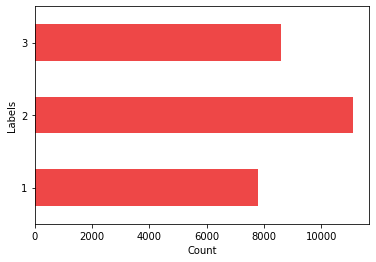

In [6]:
ax = train_dfa['sentiment'].value_counts(sort=False).plot(kind='barh', color='#EE4747')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

In [7]:
train_dfa['len'] = train_dfa['text'].str.len() # Store string length of each sample
train_dfa = train_dfa.sort_values(['len'], ascending=True)
train_dfa = train_dfa.dropna()
train_dfa.tail(5) #We see that most of the short text phrases are rated positive

,textID,text,selected_text,sentiment,len
2582,72df0ca5a2,TODAy SUCKs - kisskass19: ï¿½you and katey bro...,SUCKs,1,139.0
16851,a7595518c2,"4 novos followers http://migre.me/SfN Sorry, t...","Sorry,",1,139.0
13896,3312d3de45,Feeling madly sorry for myself... - ï¿½Iï¿½M S...,madly sorry,1,140.0
27318,d370238b6b,just saw an advert for ATTICS TO EDEN on tv o...,just saw an advert for ATTICS TO EDEN on tv o...,2,141.0
3138,0d64ba9efd,Is so freaking bored on the bus. Hate being po...,bored,1,141.0


In [8]:
test_dfa = test_df.copy()
test_dfa.replace(cleanup_nums, inplace=True)
test_dfa.head(5)

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,2
1,96d74cb729,Shanghai is also really exciting (precisely -...,3
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",1
3,01082688c6,happy bday!,3
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,3


# Get the embeddings using BERT

In [ ]:
from bert_serving.client import BertClient

# make a connection with the BERT server using it's ip address
bc = BertClient(ip="YOUR_SERVER_IP")
# get the embedding for train and val sets
X_tr_bert = bc.encode(X_tr.tolist())
X_val_bert = bc.encode(X_val.tolist())

# Training a Neural Network Classifier

              precision    recall  f1-score      support
negative       0.782700  0.370629  0.503051  1001.000000
neutral        0.531678  0.868531  0.659586  1430.000000
positive       0.821823  0.539438  0.651341  1103.000000
accuracy       0.624788  0.624788  0.624788     0.624788
macro avg      0.712067  0.592866  0.604659  3534.000000
weighted avg   0.693337  0.624788  0.612674  3534.000000


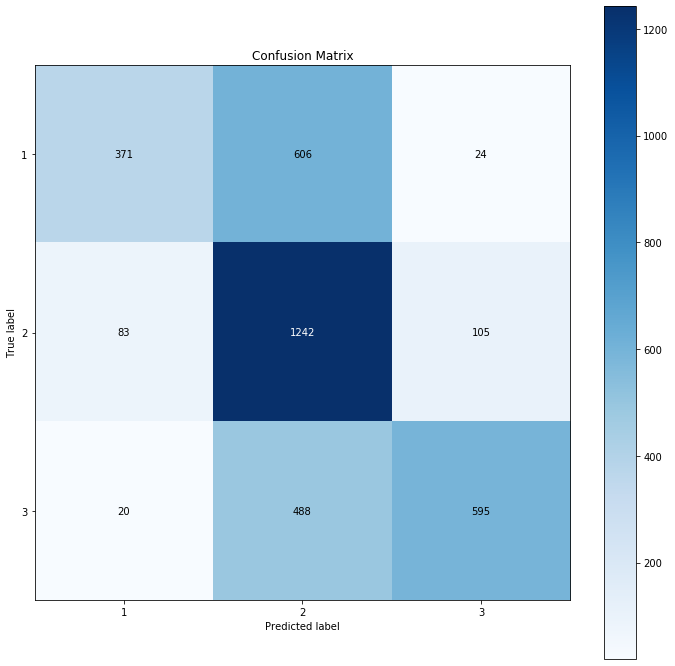

In [9]:
# Create a pipeline which transforms phrases into normalized feature vectors and uses a bayes estimator
pipeline_bayes = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('gnb', MultinomialNB()),
                ])

# Train model using the created sklearn pipeline
learner_bayes = pipeline_bayes.fit(train_dfa['text'], train_dfa['sentiment'])

# Predict class labels using the learner function
test_dfa['pred'] = learner_bayes.predict(test_dfa['text'])
y_true = test_dfa['sentiment']
y_pred = test_dfa['pred']
target_names = ['negative', 'neutral', 'positive']

# Confusion Matrix
results_bayes = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
results_df_bayes = pd.DataFrame(results_bayes).transpose()
print(results_df_bayes)
skplt.metrics.plot_confusion_matrix(y_true, y_pred, figsize=(12,12))

# Making some test predictions

In [10]:
testphrases = ['Mondays just suck!', 'I love this product', 'That is a tree', 'Terrible service']
for testphrase in testphrases:
    resultx = learner_log.predict([testphrase])
    dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
    print(testphrase + '-> ' + dict[resultx[0]])

NameError: name 'learner_log' is not defined